## Health Care for All Case Study using Pandas

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


## Pipeline Controller

In [84]:
#hk_df=(load_original_data(path="hk_for_all_pre_processed_data/helathcareforall.csv" ) 
#.pipe(lower_case_column_names)
#.pipe(rename_columns) 
#.pipe(drop_columns)   
      

### Loading Data

In [85]:
def load_original_data():
    file1 = pd.read_csv('Data/file1.csv')
    file2 = pd.read_csv('Data/file2.txt', sep = '\t')
    file3 = pd.read_excel('Data/file3.xlsx')
    file4 = pd.read_excel('Data/file4.xlsx')
    return pd.concat([file1,file2,file3, file4], axis=0)

In [86]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.txt', sep = '\t')
file3 = pd.read_excel('Data/file3.xlsx')
file4 = pd.read_excel('Data/file4.xlsx')


In [87]:
file4.shape
file1.describe()
file1.columns

Index(['CONTROLN', 'STATE', 'GENDER', 'HV1', 'IC1', 'IC4', 'HVP1', 'IC5',
       'POBC1', 'POBC2', 'IC2', 'IC3', 'AVGGIFT', 'TCODE', 'DOB', 'DOMAIN',
       'TARGET_D'],
      dtype='object')

### Merging Data

In [88]:
hk_df = pd.concat([file1,file2,file3, file4], axis=0)
hk_df

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714,2,6101,S2,50.0
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769,28,7401,C1,10.0
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667,1,3301,S2,5.0
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000,1,7301,T2,14.0


### Make the column names lower case

#### Excercise:



Can you figure out how to use list comprehension and string methods in order to have all the column names in lowercase in the data frame?

In [89]:
def lower_case_column_names(hk_df):
    hk_df.columns=[i.lower() for i in hk_df.columns]
    return hk_df

In [90]:
lower_case_column_names(hk_df)

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714,2,6101,S2,50.0
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769,28,7401,C1,10.0
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667,1,3301,S2,5.0
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000,1,7301,T2,14.0


#### Renaming columns

Columns names can be replaced in several ways. 

One of them is to provide a new **list of column names** and replace the value of `df.columns`

Another is to use the method `.rename()` which can be applied to a dataframe. This method needs as an input a **dictionary** in which the old column names are the keys, while the new column names are the values.



#### Excercise:

Can you rename the columns with the names from the variables_description file

In [91]:
def rename_columns(hk_df):
    hk_df.rename(columns={'controln':'id','hv1':'median_home_val', 'ic1':'median_household_income',"ic2":"med_fam_income", "ic3":"avg_household_income","ic4": "avg_fam_income","ic5":"per_capita_income"}, inplace=True )
    return hk_df

In [92]:
rename_columns(hk_df)

,id,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc1,pobc2,med_fam_income,avg_household_income,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714,2,6101,S2,50.0
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769,28,7401,C1,10.0
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667,1,3301,S2,5.0
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000,1,7301,T2,14.0


#### Deleting columns

In [93]:
def drop_columns(hk_df) :
    hk_df.drop(columns=["id","tcode",'pobc1'], inplace=True)
    return hk_df

In [94]:
drop_columns(hk_df)

,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc2,med_fam_income,avg_household_income,avggift,dob,domain,target_d
0,FL,M,AAA896,392,520.0,7,21975,16,430.0,466,28.000000,1901,C2,100.0
1,IL,M,537.00,365,473.0,0,19387,89,415.0,410,5.666667,0,T2,7.0
2,FL,F,725.00,301,436.0,3,18837,17,340.0,361,4.111111,2501,C2,5.0
3,NC,M,AAA1095,401,413.0,7,14014,74,407.0,399,27.277778,2208,T2,38.0
4,FL,F,995.00,252,348.0,0,17991,6,280.0,316,6.000000,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,F,742,396,470.0,0,15356,37,424.0,450,14.285714,6101,S2,50.0
1002,FL,M,599,100,423.0,4,11670,27,406.0,200,9.230769,7401,C1,10.0
1003,ND,M,593,258,299.0,0,10186,70,298.0,274,5.266667,3301,S2,5.0
1004,WI,male,564,217,397.0,0,12315,96,386.0,295,11.400000,7301,T2,14.0


In [95]:
hk_df

,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc2,med_fam_income,avg_household_income,avggift,dob,domain,target_d
0,FL,M,AAA896,392,520.0,7,21975,16,430.0,466,28.000000,1901,C2,100.0
1,IL,M,537.00,365,473.0,0,19387,89,415.0,410,5.666667,0,T2,7.0
2,FL,F,725.00,301,436.0,3,18837,17,340.0,361,4.111111,2501,C2,5.0
3,NC,M,AAA1095,401,413.0,7,14014,74,407.0,399,27.277778,2208,T2,38.0
4,FL,F,995.00,252,348.0,0,17991,6,280.0,316,6.000000,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,F,742,396,470.0,0,15356,37,424.0,450,14.285714,6101,S2,50.0
1002,FL,M,599,100,423.0,4,11670,27,406.0,200,9.230769,7401,C1,10.0
1003,ND,M,593,258,299.0,0,10186,70,298.0,274,5.266667,3301,S2,5.0
1004,WI,male,564,217,397.0,0,12315,96,386.0,295,11.400000,7301,T2,14.0


#### Rearanging columns

In [96]:
list(hk_df.columns)

['state',
 'gender',
 'median_home_val',
 'median_household_income',
 'avg_fam_income',
 'hvp1',
 'per_capita_income',
 'pobc2',
 'med_fam_income',
 'avg_household_income',
 'avggift',
 'dob',
 'domain',
 'target_d']

Reordering columns is as simple as replace the dataframe with the new ordering of the columns.

In [97]:
hk_df = hk_df[[
 'state',
 "gender",
 'median_home_val',
 'avg_fam_income',
 'avg_household_income',
 'med_fam_income',
 'median_household_income',
 'hvp1',
 "per_capita_income",
 'pobc2',
 'avggift',
 'dob',
 'domain',
 'target_d']]

hk_df.head()

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,1901,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,0,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,2501,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,2208,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,0,C2,5.0


#### Indexing & subsetting

Let's see one example of a filter:

select people who have "M" as their gender

In [98]:
hk_df.gender.unique()
hk_df.describe()
hk_df.info()
hk_df.value_counts('gender')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    4028 non-null   object 
 1   gender                   3892 non-null   object 
 2   median_home_val          4026 non-null   object 
 3   avg_fam_income           4027 non-null   float64
 4   avg_household_income     4028 non-null   int64  
 5   med_fam_income           4027 non-null   float64
 6   median_household_income  4028 non-null   int64  
 7   hvp1                     4028 non-null   int64  
 8   per_capita_income        4028 non-null   object 
 9   pobc2                    4028 non-null   int64  
 10  avggift                  4028 non-null   float64
 11  dob                      4028 non-null   int64  
 12  domain                   4028 non-null   object 
 13  target_d                 4028 non-null   float64
dtypes: float64(4), int64(5),

gender
F          1966
M          1474
male        128
female      106
Female       77
U            69
Male         33
J            23
feamale      15
A             1
dtype: int64

In [100]:
hk_df.gender.describe()

count     3892
unique      10
top          F
freq      1966
Name: gender, dtype: object

We can use several filters but each condition or filter should be placed within parentheses.

Select people who have either "M" or "F" as their gender

& -> and
| -> or

In [18]:
hk_df[(hk_df['gender'] == "M") | (hk_df['gender'] == "F")] # & -> and, | -> or

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,1901,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,0,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,2501,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,2208,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,MI,M,444,299.0,269,264.0,225,3,10088,86,17.142857,405,R2,25.0
1001,FL,F,742,470.0,450,424.0,396,0,15356,37,14.285714,6101,S2,50.0
1002,FL,M,599,423.0,200,406.0,100,4,11670,27,9.230769,7401,C1,10.0
1003,ND,M,593,299.0,274,298.0,258,0,10186,70,5.266667,3301,S2,5.0


In [19]:
hk_df[(hk_df['gender'] == "M") | (hk_df['gender'] == "F")]
#hk_df[np.where(hk_df['gender'].isin(["M","F"])) == True]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,1901,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,0,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,2501,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,2208,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,MI,M,444,299.0,269,264.0,225,3,10088,86,17.142857,405,R2,25.0
1001,FL,F,742,470.0,450,424.0,396,0,15356,37,14.285714,6101,S2,50.0
1002,FL,M,599,423.0,200,406.0,100,4,11670,27,9.230769,7401,C1,10.0
1003,ND,M,593,299.0,274,298.0,258,0,10186,70,5.266667,3301,S2,5.0


Another example:

Select people who have for which 'target_d' > 15:

In [20]:
hk_df[hk_df['target_d'] > 15]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,1901,C2,100.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,2208,T2,38.0
5,IL,M,764.00,501.0,480,477.0,457,1,16022,75,25.571429,6104,S2,30.0
16,FL,F,1513,702.0,615,599.0,521,31,28124,24,18.500000,2701,T1,28.0
24,MT,M,717,432.0,349,458.0,302,1,15614,53,9.700000,4304,C1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,FL,M,595,274.0,262,263.0,252,0,11132,11,14.692308,2501,T2,20.0
998,CA,F,2707,537.0,538,504.0,507,80,16165,54,12.117647,4001,U1,22.0
999,CA,M,2666,653.0,612,609.0,535,63,24745,45,12.333333,4401,S1,21.0
1000,MI,M,444,299.0,269,264.0,225,3,10088,86,17.142857,405,R2,25.0


Select people from Florida ("FL")

In [21]:
hk_df[hk_df['state'] == "FL"].head(10)

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,1901,C2,100.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,2501,C2,5.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,0,C2,5.0
16,FL,F,1513,702.0,615,599.0,521,31,28124,24,18.500000,2701,T1,28.0
17,FL,F,948,411.0,368,365.0,330,4,17728,8,15.000000,6501,C2,15.0
20,FL,F,556,NaN,320,358.0,318,0,11779,22,9.428571,5107,S3,12.0
34,FL,M,559,269.0,257,270.0,232,0,10511,20,12.611111,2601,S3,20.0
55,FL,F,625,536.0,362,466.0,246,3,19102,47,14.090909,1401,S1,20.0
94,FL,NaN,581,373.0,359,361.0,349,0,9667,53,9.857143,2607,S2,15.0
101,FL,M,825,301.0,290,239.0,233,0,9747,21,20.000000,0,C3,20.0


How many people from each gender in Florida?

In [22]:
hk_df[(hk_df['gender'] == "M") & (hk_df['state'] == "FL") ].shape[0]

154

In [23]:
hk_df[(hk_df['gender'].isin(["M","F"]) == True) & (hk_df['state'] == "FL") ].shape

(325, 14)

We can get how many possible values we have for one particular column using the method `.value_counts()`. This method returns a pandas **Series**

In [24]:
hk_df[hk_df['state'] == "FL"]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,1901,C2,100.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,2501,C2,5.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,0,C2,5.0
16,FL,F,1513,702.0,615,599.0,521,31,28124,24,18.500000,2701,T1,28.0
17,FL,F,948,411.0,368,365.0,330,4,17728,8,15.000000,6501,C2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,FL,M,599,423.0,200,406.0,100,4,11670,27,9.230769,7401,C1,10.0
992,FL,M,677,313.0,324,272.0,311,0,12509,23,10.115385,2703,C2,10.0
997,FL,M,595,274.0,262,263.0,252,0,11132,11,14.692308,2501,T2,20.0
1001,FL,F,742,470.0,450,424.0,396,0,15356,37,14.285714,6101,S2,50.0


In [25]:
type(hk_df[hk_df['state'] == "FL"])

pandas.core.frame.DataFrame

In [26]:
hk_df[hk_df['state'] == "FL"]['gender']

0       M
2       F
4       F
16      F
17      F
       ..
973     M
992     M
997     M
1001    F
1002    M
Name: gender, Length: 342, dtype: object

In [27]:
type(hk_df[hk_df['state'] == "FL"]['gender'])

pandas.core.series.Series

In [28]:
hk_df[hk_df['state'] == "FL"]['gender'].value_counts(dropna=False)

F      171
M      154
NaN     13
J        3
U        1
Name: gender, dtype: int64

In [29]:
hk_df[hk_df['state'] == "FL"]['gender'].unique()

array(['M', 'F', nan, 'J', 'U'], dtype=object)

In [30]:
hk_df['gender'].value_counts(dropna=True)

F          1966
M          1474
male        128
female      106
Female       77
U            69
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

In [31]:
type(hk_df['gender'].value_counts())

pandas.core.series.Series

In [32]:
hk_df['gender'].value_counts()['Female']

77

In [33]:
hk_df['gender'].value_counts().sum()

3892

The method `.value_counts()` doesn't show the missing values. If we want to know if there are any, we can provide the option `dropna=False`.

In [34]:
hk_df['gender'].value_counts(dropna=False).sum()

4028

In [35]:
hk_df['gender'].value_counts(dropna=False)

F          1966
M          1474
NaN         136
male        128
female      106
Female       77
U            69
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

We can know what are the unique values of a column using the method `.unique()`, and then the method `.tolist()` to castthe resulting **Series** into a list.

In [36]:
hk_df["gender"].unique().tolist()

['M', 'F', 'female', 'Male', nan, 'U', 'J', 'male', 'Female', 'feamale', 'A']

In [37]:
hk_df.shape

(4028, 14)

The method `.info()` allow us to obtain information about every column in the dataframe

In [38]:
hk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    4028 non-null   object 
 1   gender                   3892 non-null   object 
 2   median_home_val          4026 non-null   object 
 3   avg_fam_income           4027 non-null   float64
 4   avg_household_income     4028 non-null   int64  
 5   med_fam_income           4027 non-null   float64
 6   median_household_income  4028 non-null   int64  
 7   hvp1                     4028 non-null   int64  
 8   per_capita_income        4028 non-null   object 
 9   pobc2                    4028 non-null   int64  
 10  avggift                  4028 non-null   float64
 11  dob                      4028 non-null   int64  
 12  domain                   4028 non-null   object 
 13  target_d                 4028 non-null   float64
dtypes: float64(4), int64(5),

The method `.describe()` give us a **dataframe** with an statistical summary of every column

In [39]:
temp = hk_df.describe().transpose()
temp

,count,mean,std,min,25%,50%,75%,max
avg_fam_income,4027.0,444.664515,174.857272,0.00000,325.000000,410.00,528.000000,1331.0
avg_household_income,4028.0,399.788232,164.702061,0.00000,287.000000,365.00,479.250000,1311.0
med_fam_income,4027.0,400.639930,180.377938,0.00000,284.000000,366.00,477.000000,1500.0
median_household_income,4028.0,351.569265,168.316241,0.00000,239.000000,318.00,425.000000,1500.0
hvp1,4028.0,15.961519,28.841221,0.00000,0.000000,1.00,14.000000,99.0
pobc2,4028.0,55.476167,21.510554,0.00000,41.000000,57.00,73.000000,99.0
avggift,4028.0,11.771435,10.136313,2.26087,7.181818,10.00,14.388462,450.0
dob,4028.0,2708.451092,2054.519861,0.00000,609.750000,2656.50,4401.000000,9310.0
target_d,4028.0,15.645603,12.672374,1.00000,10.000000,13.46,20.000000,200.0


#### Indexing

Select rows 5 and 6:

In [40]:
hk_df.iloc[5:7]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
5,IL,M,764.00,501.0,480,477.0,457,1,16022,75,25.571429,6104,S2,30.0
6,NC,female,775.00,419.0,380,364.0,318,5,13491,73,4.625000,4407,R2,12.0


In [41]:
hk_df.iloc[[5,7],[0,2]]

,state,median_home_val
5,IL,764.00
7,TX,890.00


In [42]:
hk_df.head()

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,1901,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,0,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,2501,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,2208,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,0,C2,5.0


Select columns "gender" and "medina_home_value", and rows 4 to 10:

In [43]:
hk_df.gender

0          M
1          M
2          F
3          M
4          F
        ... 
1001       F
1002       M
1003       M
1004    male
1005       M
Name: gender, Length: 4028, dtype: object

In [44]:
hk_df.gender.unique()

array(['M', 'F', 'female', 'Male', nan, 'U', 'J', 'male', 'Female',
       'feamale', 'A'], dtype=object)

In [45]:
hk_df.iloc[4:10,[2,1]]

,median_home_val,gender
4,995.00,F
5,764.00,M
6,775.00,female
7,890.00,M
8,NaN,F
9,AAA2294,F


In [46]:
hk_df.iloc[4:10,:]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,0,C2,5.0
5,IL,M,764.00,501.0,480,477.0,457,1,16022,75,25.571429,6104,S2,30.0
6,NC,female,775.00,419.0,380,364.0,318,5,13491,73,4.625000,4407,R2,12.0
7,TX,M,890.00,560.0,551,525.0,519,0,17872,46,6.175000,0,C1,7.0
8,CA,F,NaN,250.0,235,206.0,184,0,8708,63,8.818182,1801,T2,10.0
9,CA,F,AAA2294,617.0,619,NaN,593,61,17838,62,6.666667,0,S1,10.0


In [47]:
hk_df.iloc[:,4:10]

,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2
0,466,430.0,392,7,21975,16
1,410,415.0,365,0,19387,89
2,361,340.0,301,3,18837,17
3,399,407.0,401,7,14014,74
4,316,280.0,252,0,17991,6
...,...,...,...,...,...,...
1001,450,424.0,396,0,15356,37
1002,200,406.0,100,4,11670,27
1003,274,298.0,258,0,10186,70
1004,295,386.0,217,0,12315,96


#### Correcting data types

With `to_numeric` 

In [48]:
hk_df.dtypes

state                       object
gender                      object
median_home_val             object
avg_fam_income             float64
avg_household_income         int64
med_fam_income             float64
median_household_income      int64
hvp1                         int64
per_capita_income           object
pobc2                        int64
avggift                    float64
dob                          int64
domain                      object
target_d                   float64
dtype: object

In [49]:
hk_df['median_home_val'] =  pd.to_numeric(hk_df['median_home_val'], errors='coerce')
hk_df['median_household_income'] =  pd.to_numeric(hk_df['median_household_income'], errors='coerce')
hk_df['per_capita_income'] =  pd.to_numeric(hk_df['per_capita_income'], errors='coerce')

In [50]:
hk_df['avggift'] = hk_df['avggift'].astype('int')

In [51]:
hk_df.dtypes

state                       object
gender                      object
median_home_val            float64
avg_fam_income             float64
avg_household_income         int64
med_fam_income             float64
median_household_income      int64
hvp1                         int64
per_capita_income          float64
pobc2                        int64
avggift                      int64
dob                          int64
domain                      object
target_d                   float64
dtype: object

In [52]:
hk_df.select_dtypes('object')

,state,gender,domain
0,FL,M,C2
1,IL,M,T2
2,FL,F,C2
3,NC,M,T2
4,FL,F,C2
...,...,...,...
1001,FL,F,S2
1002,FL,M,C1
1003,ND,M,S2
1004,WI,male,T2


In [53]:
hk_df.select_dtypes('float64')

,median_home_val,avg_fam_income,med_fam_income,per_capita_income,target_d
0,NaN,520.0,430.0,21975.0,100.0
1,537.0,473.0,415.0,19387.0,7.0
2,725.0,436.0,340.0,18837.0,5.0
3,NaN,413.0,407.0,14014.0,38.0
4,995.0,348.0,280.0,17991.0,5.0
...,...,...,...,...,...
1001,742.0,470.0,424.0,15356.0,50.0
1002,599.0,423.0,406.0,11670.0,10.0
1003,593.0,299.0,298.0,10186.0,5.0
1004,564.0,397.0,386.0,12315.0,14.0


In [54]:
hk_df._get_numeric_data()

,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,target_d
0,NaN,520.0,466,430.0,392,7,21975.0,16,28,1901,100.0
1,537.0,473.0,410,415.0,365,0,19387.0,89,5,0,7.0
2,725.0,436.0,361,340.0,301,3,18837.0,17,4,2501,5.0
3,NaN,413.0,399,407.0,401,7,14014.0,74,27,2208,38.0
4,995.0,348.0,316,280.0,252,0,17991.0,6,6,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1001,742.0,470.0,450,424.0,396,0,15356.0,37,14,6101,50.0
1002,599.0,423.0,200,406.0,100,4,11670.0,27,9,7401,10.0
1003,593.0,299.0,274,298.0,258,0,10186.0,70,5,3301,5.0
1004,564.0,397.0,295,386.0,217,0,12315.0,96,11,7301,14.0


#### Removing duplicates

We can remove duplicate rows with the method `drop_duplicates()`

In [55]:
hk_df.drop_duplicates()

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
0,FL,M,NaN,520.0,466,430.0,392,7,21975.0,16,28,1901,C2,100.0
1,IL,M,537.0,473.0,410,415.0,365,0,19387.0,89,5,0,T2,7.0
2,FL,F,725.0,436.0,361,340.0,301,3,18837.0,17,4,2501,C2,5.0
3,NC,M,NaN,413.0,399,407.0,401,7,14014.0,74,27,2208,T2,38.0
4,FL,F,995.0,348.0,316,280.0,252,0,17991.0,6,6,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,MI,F,632.0,388.0,339,336.0,279,2,12653.0,71,8,0,0,5.0
997,FL,M,595.0,274.0,262,263.0,252,0,11132.0,11,14,2501,T2,20.0
998,CA,F,2707.0,537.0,538,504.0,507,80,16165.0,54,12,4001,U1,22.0
999,CA,M,2666.0,653.0,612,609.0,535,63,24745.0,45,12,4401,S1,21.0


In [56]:
#hk_df.gender.drop_duplicates()

- Dropping columns with more null values
- Replacing / imputing null values
- Removing outliers

In [57]:
# hk_df.isna().sum()
# hk_df.isna().sum()/len(hk_df)
round(hk_df.isna().sum()/len(hk_df),4)*100  # shows the percentage of null values in a column

state                      0.00
gender                     3.38
median_home_val            0.25
avg_fam_income             0.02
avg_household_income       0.00
med_fam_income             0.02
median_household_income    0.00
hvp1                       0.00
per_capita_income          0.15
pobc2                      0.00
avggift                    0.00
dob                        0.00
domain                     0.00
target_d                   0.00
dtype: float64

<b> dropping columns with more null values -- analyst decides the threshold value

note: that the threshold values are usually higher percentages, for eg if 70% or more values in a column are missing, then its a good idea to drop those columns 


In [58]:
nulls_df = pd.DataFrame(round(hk_df.isna().sum()/len(hk_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,state,0.00
1,gender,3.38
2,median_home_val,0.25
3,avg_fam_income,0.02
4,avg_household_income,0.00
5,med_fam_income,0.02
6,median_household_income,0.00
7,hvp1,0.00
8,per_capita_income,0.15
9,pobc2,0.00


In [59]:
columns_drop = nulls_df[nulls_df['percent_nulls']>3]['header_name']  # dummy case with 3 
print(columns_drop.values)

['gender']


### Replacing / imputing null values

Numerical columns: Some ways to approach the problem

- Ignore these observations
-Replace with general average
-Replace with similar type of averages
-Build model to predict missing values

if you have sufficient hk_df and losing a few rows of hk_df is not too bad, you can filter those
rows out as well

In [60]:
hk_df[hk_df['gender'].isna()==True] # checking rows that are null based on a specific column 

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d
15,MI,NaN,890.0,523.0,512,474.0,463,1,9493.0,53,11,5102,S1,15.0
21,OK,NaN,1040.0,656.0,579,609.0,472,0,26962.0,56,11,0,C2,15.0
22,AR,NaN,603.0,341.0,288,264.0,208,2,12038.0,70,5,0,0,5.0
54,CA,NaN,2143.0,373.0,328,353.0,280,63,12935.0,36,9,1901,0,14.0
77,Cali,NaN,2016.0,497.0,459,465.0,431,51,17882.0,53,8,0,S1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,TN,NaN,1349.0,628.0,521,593.0,481,21,22094.0,45,5,0,T1,11.0
860,KY,NaN,896.0,507.0,493,464.0,455,1,18693.0,79,10,0,T1,19.0
894,TN,NaN,585.0,326.0,286,258.0,212,4,13218.0,71,10,0,R3,15.0
946,MI,NaN,928.0,527.0,403,463.0,334,1,23732.0,57,15,0,S3,25.0


In [61]:
hk_df = hk_df[hk_df['med_fam_income'].isna()==False] # Since these nulls are not a lot, we can filter them 
hk_df = hk_df[hk_df['avg_fam_income'].isna()==False]
hk_df = hk_df[hk_df['per_capita_income'].isna()==False]

In [62]:
mean_median_home_value = np.mean(hk_df['median_home_val'])
hk_df['median_home_val'] = hk_df['median_home_val'].fillna(mean_median_home_value)

Replacing null values for categorical variables 

General Approaches:
    
- Ignore observation
- Replace by most frequent value
- Replace using an algorithm like KNN using the neighbours.
- Predict the observation using a multiclass predictor
- Treat missing data as just another category



In [63]:
hk_df['gender'].value_counts()

F          1958
M          1474
male        128
female      106
Female       77
U            69
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

In [64]:
len(hk_df[hk_df['gender'].isna()==True])  # number of missing values

136

In [65]:
hk_df['gender'] = hk_df['gender'].fillna('F')

In [66]:
hk_df['gender'].unique() # check the unique values in the column

array(['M', 'F', 'female', 'Male', 'U', 'J', 'male', 'Female', 'feamale',
       'A'], dtype=object)

Cleaning column gender using map function and another user defined function

In [67]:
def clean_gender(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x.startswith('F'):
        return 'Female'
    else:
        return 'U'

In [68]:
hk_df['gender'] = list(map(clean_gender, hk_df['gender'])) 

In [69]:
hk_df.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

### Removing outliers 
This is done using a box plot which we will cover later. After identifying the upper limit and the lower limit values for a numerical column, we can use filters to remove those rows from the dataframe

### Creating buckets / groups of data 

In [70]:
pd.cut(hk_df['med_fam_income'],4) # to check the bins

0       (375.0, 750.0]
1       (375.0, 750.0]
2        (-1.5, 375.0]
3       (375.0, 750.0]
4        (-1.5, 375.0]
             ...      
1001    (375.0, 750.0]
1002    (375.0, 750.0]
1003     (-1.5, 375.0]
1004    (375.0, 750.0]
1005    (375.0, 750.0]
Name: med_fam_income, Length: 4020, dtype: category
Categories (4, interval[float64]): [(-1.5, 375.0] < (375.0, 750.0] < (750.0, 1125.0] < (1125.0, 1500.0]]

In [71]:
med_fam_income_labels = ['Low', 'Moderate', 'High', 'Very High']
hk_df['med_fam_income_binned'] = pd.cut(hk_df['med_fam_income'],4, labels=med_fam_income_labels)


In [72]:
hk_df

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d,med_fam_income_binned
0,FL,Male,1159.148591,520.0,466,430.0,392,7,21975.0,16,28,1901,C2,100.0,Moderate
1,IL,Male,537.000000,473.0,410,415.0,365,0,19387.0,89,5,0,T2,7.0,Moderate
2,FL,Female,725.000000,436.0,361,340.0,301,3,18837.0,17,4,2501,C2,5.0,Low
3,NC,Male,1159.148591,413.0,399,407.0,401,7,14014.0,74,27,2208,T2,38.0,Moderate
4,FL,Female,995.000000,348.0,316,280.0,252,0,17991.0,6,6,0,C2,5.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,Female,742.000000,470.0,450,424.0,396,0,15356.0,37,14,6101,S2,50.0,Moderate
1002,FL,Male,599.000000,423.0,200,406.0,100,4,11670.0,27,9,7401,C1,10.0,Moderate
1003,ND,Male,593.000000,299.0,274,298.0,258,0,10186.0,70,5,3301,S2,5.0,Low
1004,WI,U,564.000000,397.0,295,386.0,217,0,12315.0,96,11,7301,T2,14.0,Moderate


Exercise:<br>
<b>For cities create a user defined function and use it with map() to divide the cities into 5 zones - East, west, north, south, and central

#### Summary functions

sum(), mean(), max()...

In [73]:
hk_df.median_household_income.min()

0

In [74]:
hk_df["median_home_val"].sum()

4659777.337322364

In [75]:
np.sum(hk_df["median_home_val"])

4659777.337322364

## EDA and Plotting

In [76]:
hk_df

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,dob,domain,target_d,med_fam_income_binned
0,FL,Male,1159.148591,520.0,466,430.0,392,7,21975.0,16,28,1901,C2,100.0,Moderate
1,IL,Male,537.000000,473.0,410,415.0,365,0,19387.0,89,5,0,T2,7.0,Moderate
2,FL,Female,725.000000,436.0,361,340.0,301,3,18837.0,17,4,2501,C2,5.0,Low
3,NC,Male,1159.148591,413.0,399,407.0,401,7,14014.0,74,27,2208,T2,38.0,Moderate
4,FL,Female,995.000000,348.0,316,280.0,252,0,17991.0,6,6,0,C2,5.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,Female,742.000000,470.0,450,424.0,396,0,15356.0,37,14,6101,S2,50.0,Moderate
1002,FL,Male,599.000000,423.0,200,406.0,100,4,11670.0,27,9,7401,C1,10.0,Moderate
1003,ND,Male,593.000000,299.0,274,298.0,258,0,10186.0,70,5,3301,S2,5.0,Low
1004,WI,U,564.000000,397.0,295,386.0,217,0,12315.0,96,11,7301,T2,14.0,Moderate


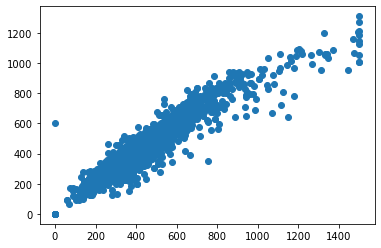

In [77]:
plt.scatter(x=hk_df['med_fam_income'], y=hk_df['avg_household_income'])
plt.show()


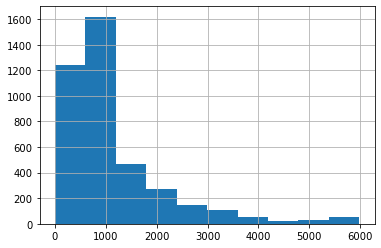

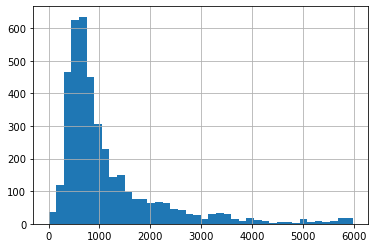

/Users/rikesan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


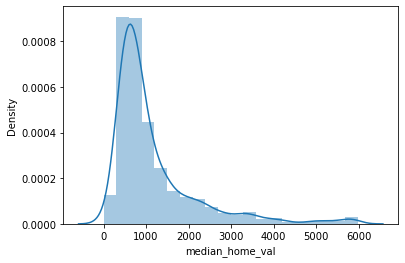

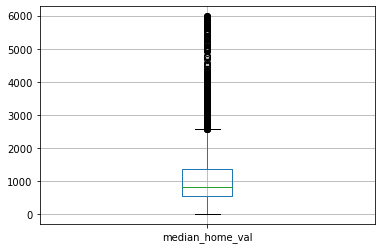

ValueError: Could not interpret input 'median_home_val'

In [78]:

hk_df['median_home_val'].hist()
plt.show()

hk_df['median_home_val'].hist(bins=40)
plt.show()

sns.distplot(hk_df['median_home_val'], bins=20)
plt.show()

hk_df[['median_home_val']].boxplot()
plt.show()

sns.boxplot(y="median_home_val", hk_df=hk_df)
plt.show()

sns.boxplot(x = 'gender',y='median_home_val', hk_df=hk_df)
plt.show()

sns.barplot(x="gender", y="median_home_val", hk_df=hk_df)
plt.show()

plt.figure(figsize=(16,16))
sns.barplot(y="state", x="median_home_val", hue= 'gender', hk_df=hk_df)
plt.show()

#### Write a csv

With `to_csv` 

In [ ]:
hk_df.to_csv("Data/healthcare_for_all_cleaned_data.csv")